In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

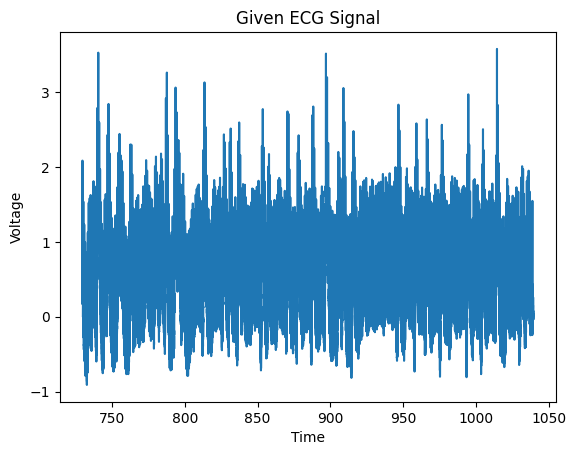

In [36]:
# Reading data from csv file
url = 'https://raw.githubusercontent.com/disha318/ecg/main/sam_ECG.csv'
data = pd.read_csv(url)
time = data['time']
voltage = data['ecg']
plt.figure()
plt.plot(time, voltage)
plt.title("Given ECG Signal")
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.show()

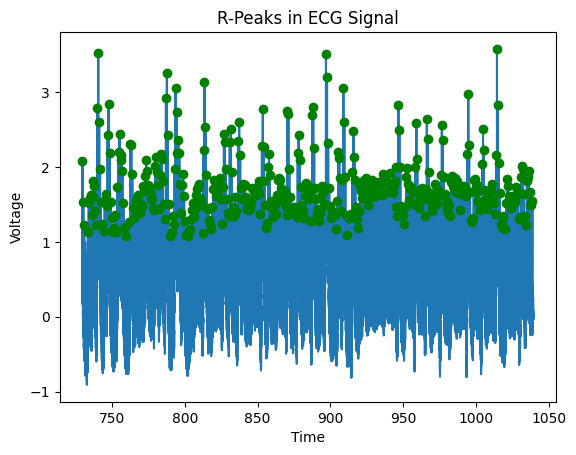

In [37]:
# Detecting peaks
fs = 1 / np.mean(np.diff(time))
def detect_r_peaks(voltage, fs):
    abs = np.abs(voltage)
    threshold = 0.3 * np.max(abs)
    peaks, _ = find_peaks(abs, height=threshold, distance=int(fs*0.5))
    return peaks
r_peaks = detect_r_peaks(voltage, fs)
plt.figure()
plt.plot(time, voltage)
plt.plot(time[r_peaks], voltage[r_peaks], 'go')
plt.title("R-Peaks in ECG Signal")
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.show()

In [38]:
# Calculating mean heart rate
heartrate = 60.0 / np.diff(time[r_peaks])
mean_heartrate = np.mean(heartrate)
print(f"Mean Heart Rate: {mean_heartrate:.2f} BPM")

Mean Heart Rate: 90.70 BPM
